I want to analyse the data in results/results_2025-07-22.csv to produce a figure that matches the format of Figure 2 in https://doi.org/10.1073/pnas.1118648109 Write some code using pandas and matplotlib to do this (note that mu=0.0004 produces 1 ignition; mu=0.002 ignitions 5 fires; mu=0.004 produces 100 ignitions)

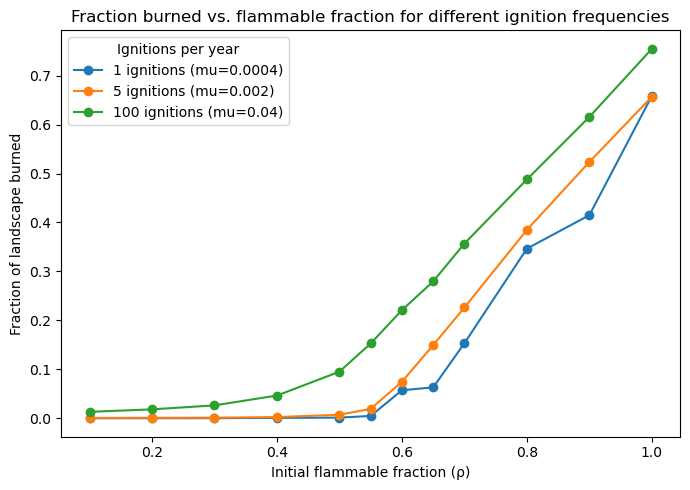

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

# Map mu to number of ignitions for legend clarity
mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}

# Prepare data for plotting
fig, ax = plt.subplots(figsize=(7,5))

for mu, n_fires in mu_to_fires.items():
    subset = df[df['mu'] == mu]
    # Group by rho (flammable fraction) and average burned fraction
    grouped = subset.groupby('rho')['burned_fraction'].mean().reset_index()
    ax.plot(grouped['rho'], grouped['burned_fraction'], marker='o', label=f'{n_fires} ignitions (mu={mu})')

ax.set_xlabel('Initial flammable fraction (ρ)')
ax.set_ylabel('Fraction of landscape burned')
ax.set_title('Fraction burned vs. flammable fraction for different ignition frequencies')
ax.legend(title='Ignitions per year')
plt.tight_layout()
plt.savefig('fig2_reproduction.png', dpi=300)
plt.show()

> How this works:
>
> Loads your results CSV.
> For each mu value, plots the mean burned fraction vs. initial flammable fraction (rho).
> Matches the format of Figure 2 in Archibald et al. (2011).
> Saves the figure as `fig2_reproduction.png` in your results folder.

Ignitions should be faceted on the horizontal with points coloured by p_spread (no need for lines connecting points). Please update the code to reflect this

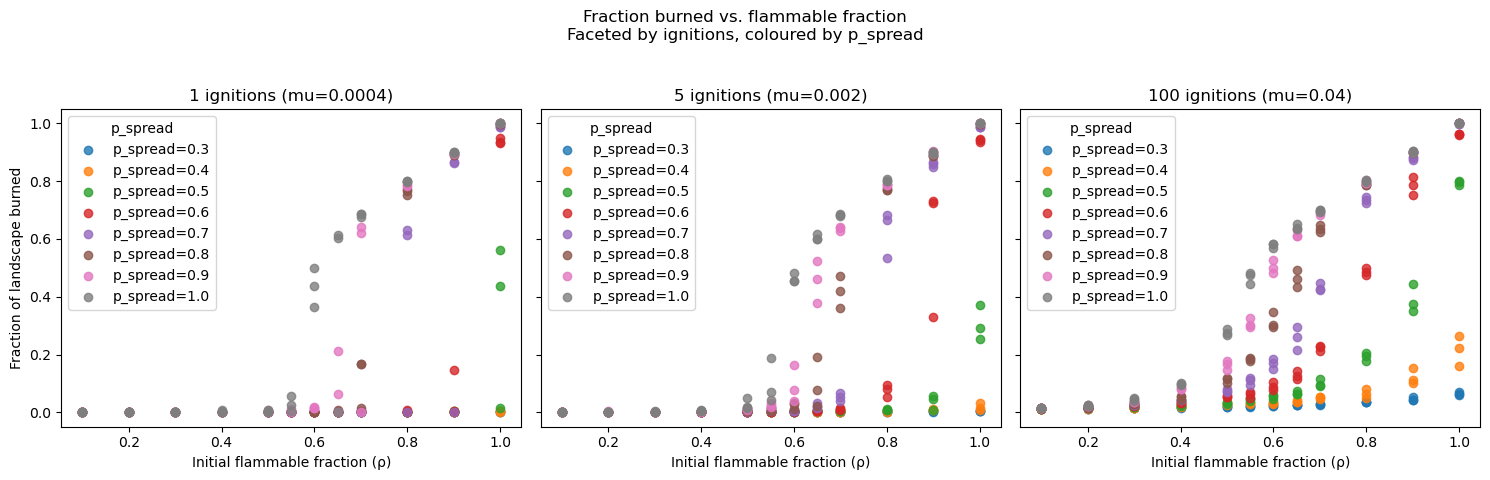

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}
mu_order = [0.0004, 0.002, 0.04]
spread_values = sorted(df['p_spread'].unique())

fig, axes = plt.subplots(1, len(mu_order), figsize=(5 * len(mu_order), 5), sharey=True)

for i, mu in enumerate(mu_order):
    ax = axes[i]
    subset = df[df['mu'] == mu]
    for p_spread in spread_values:
        sub_spread = subset[subset['p_spread'] == p_spread]
        ax.scatter(sub_spread['rho'], sub_spread['burned_fraction'], label=f'p_spread={p_spread}', alpha=0.8)
    ax.set_xlabel('Initial flammable fraction (ρ)')
    ax.set_title(f'{mu_to_fires[mu]} ignitions (mu={mu})')
    if i == 0:
        ax.set_ylabel('Fraction of landscape burned')
    ax.legend(title='p_spread', loc='best')

plt.suptitle('Fraction burned vs. flammable fraction\nFaceted by ignitions, coloured by p_spread')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('fig2_faceted.png', dpi=300)
plt.show()

Please update the code to use a red to green color palette

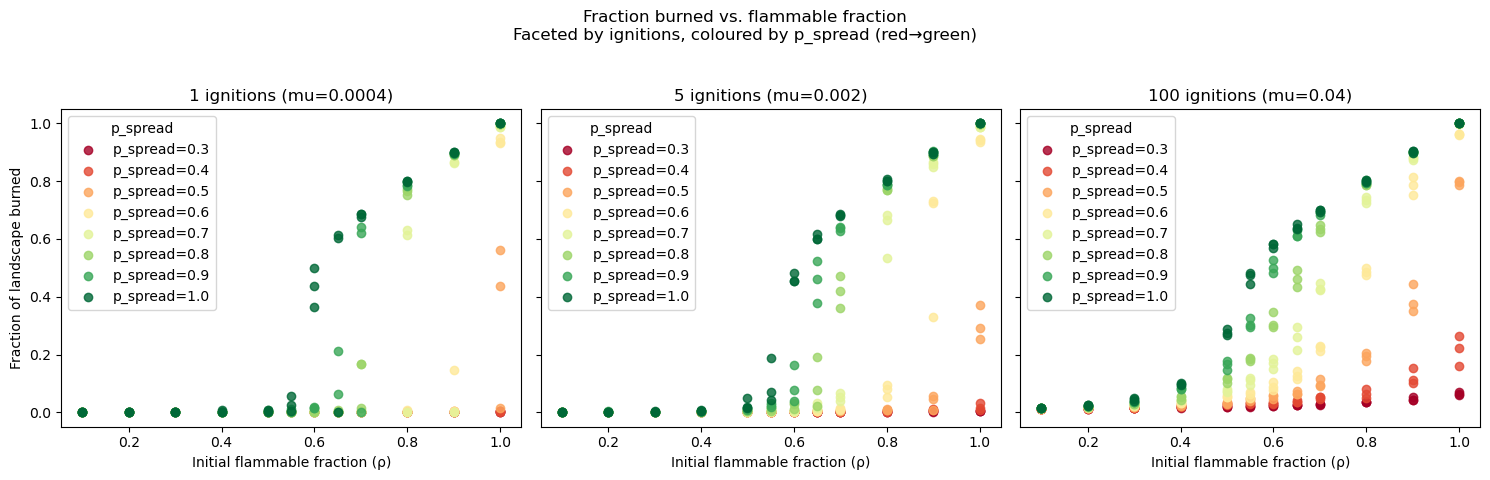

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}
mu_order = [0.0004, 0.002, 0.04]
spread_values = sorted(df['p_spread'].unique())

# Create a red to green colormap
cmap = plt.get_cmap('RdYlGn')
colors = [cmap(i / (len(spread_values)-1)) for i in range(len(spread_values))]

fig, axes = plt.subplots(1, len(mu_order), figsize=(5 * len(mu_order), 5), sharey=True)

for i, mu in enumerate(mu_order):
    ax = axes[i]
    subset = df[df['mu'] == mu]
    for j, p_spread in enumerate(spread_values):
        sub_spread = subset[subset['p_spread'] == p_spread]
        ax.scatter(sub_spread['rho'], sub_spread['burned_fraction'],
                   label=f'p_spread={p_spread}', alpha=0.8, color=colors[j])
    ax.set_xlabel('Initial flammable fraction (ρ)')
    ax.set_title(f'{mu_to_fires[mu]} ignitions (mu={mu})')
    if i == 0:
        ax.set_ylabel('Fraction of landscape burned')
    ax.legend(title='p_spread', loc='best')

plt.suptitle('Fraction burned vs. flammable fraction\nFaceted by ignitions, coloured by p_spread (red→green)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('fig2_faceted.png', dpi=300)
plt.show()

Thanks. Please reverse the colour map direction (green to red), use a single legend for the colours (p_spread) placed outside the three panes to the right

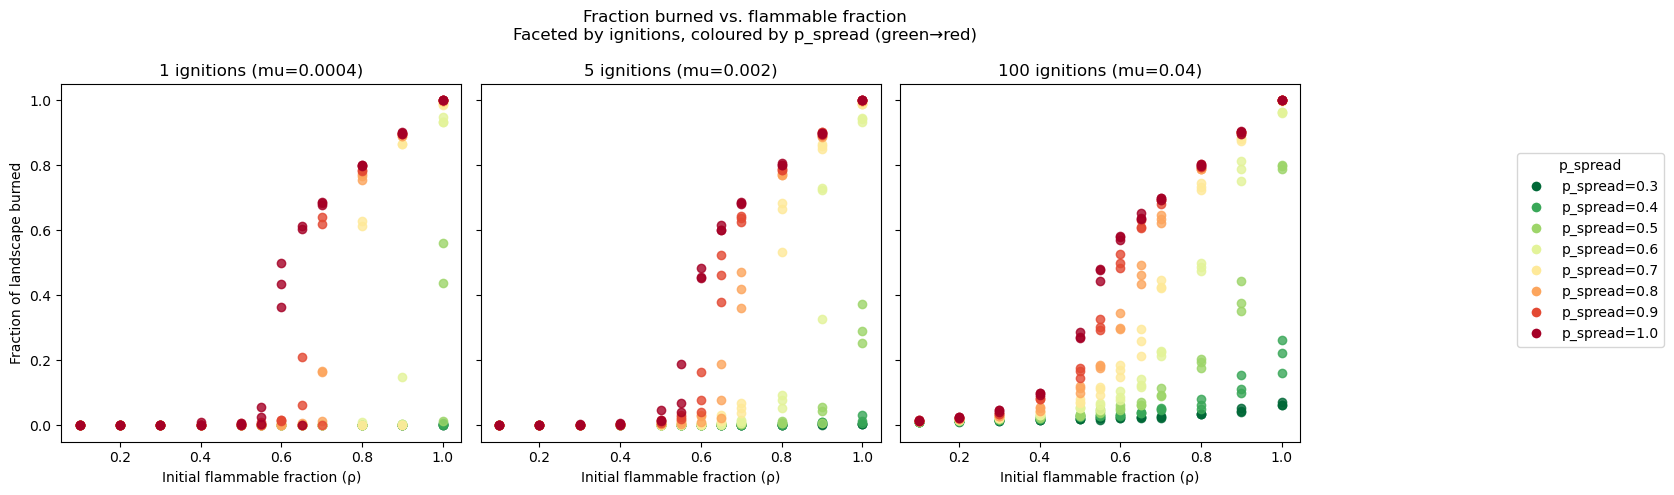

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}
mu_order = [0.0004, 0.002, 0.04]
spread_values = sorted(df['p_spread'].unique())

# Reverse colormap: green to red
cmap = plt.get_cmap('RdYlGn_r')
colors = [cmap(i / (len(spread_values)-1)) for i in range(len(spread_values))]

fig, axes = plt.subplots(1, len(mu_order), figsize=(5 * len(mu_order), 5), sharey=True)

# Store handles for legend
handles = []
labels = []

for j, p_spread in enumerate(spread_values):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[j], markersize=8))
    labels.append(f'p_spread={p_spread}')

for i, mu in enumerate(mu_order):
    ax = axes[i]
    subset = df[df['mu'] == mu]
    for j, p_spread in enumerate(spread_values):
        sub_spread = subset[subset['p_spread'] == p_spread]
        ax.scatter(sub_spread['rho'], sub_spread['burned_fraction'],
                   alpha=0.8, color=colors[j])
    ax.set_xlabel('Initial flammable fraction (ρ)')
    ax.set_title(f'{mu_to_fires[mu]} ignitions (mu={mu})')
    if i == 0:
        ax.set_ylabel('Fraction of landscape burned')

# Single legend outside the right of the panes
fig.legend(handles, labels, title='p_spread', loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.suptitle('Fraction burned vs. flammable fraction\nFaceted by ignitions, coloured by p_spread (green→red)')
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('fig2_faceted.png', dpi=300)
plt.show()

using this last code, the legend is missing - can you fix that. Also, please add a diaganol dashed line to show where x-axis values equal y-axis values

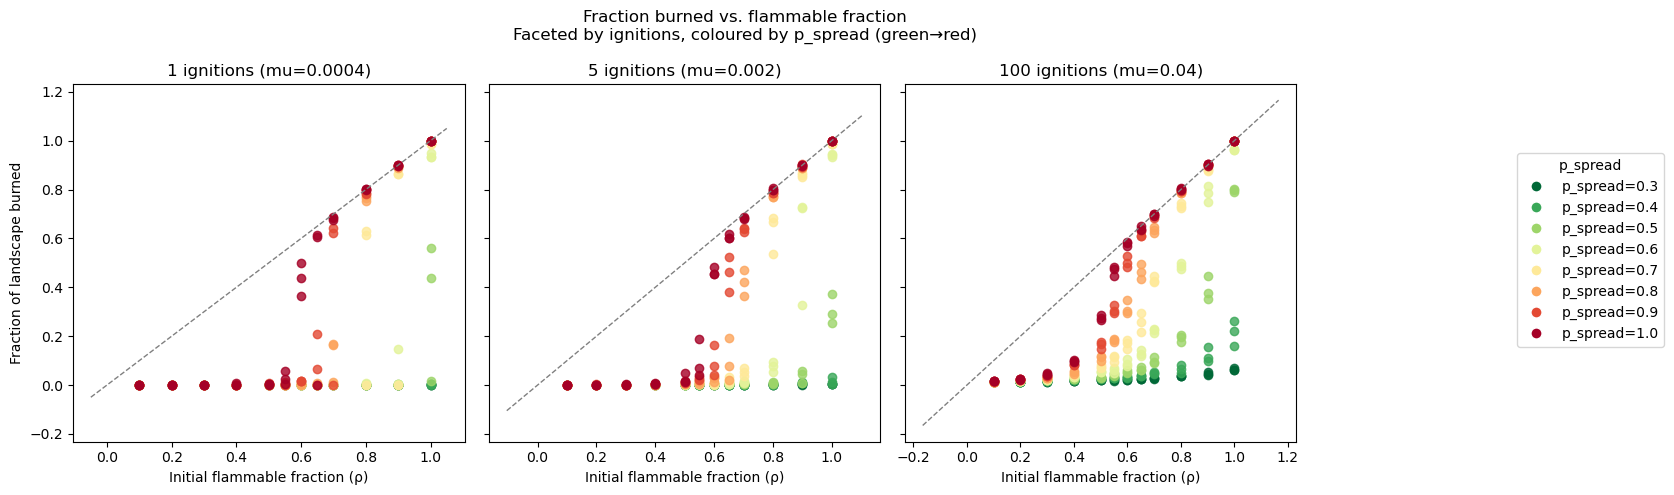

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}
mu_order = [0.0004, 0.002, 0.04]
spread_values = sorted(df['p_spread'].unique())

# colormap: green to red (reversed)
cmap = plt.get_cmap('RdYlGn_r')
colors = [cmap(i / (len(spread_values)-1)) for i in range(len(spread_values))]

fig, axes = plt.subplots(1, len(mu_order), figsize=(5 * len(mu_order), 5), sharey=True)

for i, mu in enumerate(mu_order):
    ax = axes[i]
    subset = df[df['mu'] == mu]
    for j, p_spread in enumerate(spread_values):
        sub_spread = subset[subset['p_spread'] == p_spread]
        ax.scatter(sub_spread['rho'], sub_spread['burned_fraction'],
                   alpha=0.8, color=colors[j], label=f'p_spread={p_spread}' if i == 0 else None)
    # Add diagonal dashed line
    ax_min = min(ax.get_xlim()[0], ax.get_ylim()[0])
    ax_max = max(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.plot([ax_min, ax_max], [ax_min, ax_max], ls='--', color='grey', lw=1)
    ax.set_xlabel('Initial flammable fraction (ρ)')
    ax.set_title(f'{mu_to_fires[mu]} ignitions (mu={mu})')
    if i == 0:
        ax.set_ylabel('Fraction of landscape burned')

# Create a single legend for p_spread colours outside the right of the panes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[j], markersize=8)
           for j in range(len(spread_values))]
labels = [f'p_spread={p_spread}' for p_spread in spread_values]
fig.legend(handles, labels, title='p_spread', loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.suptitle('Fraction burned vs. flammable fraction\nFaceted by ignitions, coloured by p_spread (green→red)')
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('fig2_faceted.png', dpi=300)
plt.show()

> Fixes:
> 
> - Legend is now always shown, placed outside the right.
> - Diagonal dashed line (`y=x`) is added to each subplot.
> - `plt.show()` is used so you see the plot interactively.

the legend showing the colours for p_spread is still missing. can you fix that

> Certainly! The issue is likely that `plt.close()` is called before `plt.show()`, or that the legend is not being rendered because of tight layout or figure size.
> Here's a robust way to ensure the legend appears **outside the right of the panes** and is visible both in the saved file and interactively:

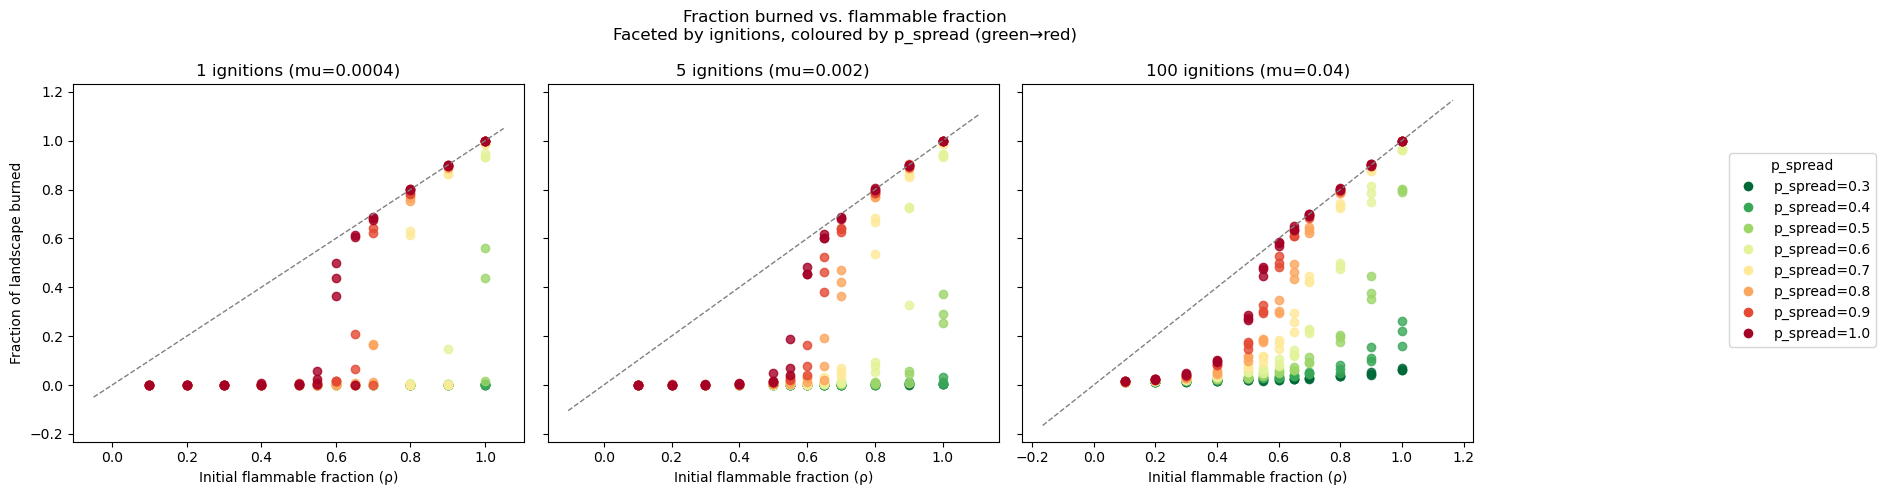

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}
mu_order = [0.0004, 0.002, 0.04]
spread_values = sorted(df['p_spread'].unique())

# colormap: green to red (reversed)
cmap = plt.get_cmap('RdYlGn_r')
colors = [cmap(i / (len(spread_values)-1)) for i in range(len(spread_values))]

fig, axes = plt.subplots(1, len(mu_order), figsize=(5 * len(mu_order) + 2, 5), sharey=True)

for i, mu in enumerate(mu_order):
    ax = axes[i]
    subset = df[df['mu'] == mu]
    for j, p_spread in enumerate(spread_values):
        sub_spread = subset[subset['p_spread'] == p_spread]
        ax.scatter(sub_spread['rho'], sub_spread['burned_fraction'],
                   alpha=0.8, color=colors[j])
    # Add diagonal dashed line
    ax_min = min(ax.get_xlim()[0], ax.get_ylim()[0])
    ax_max = max(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.plot([ax_min, ax_max], [ax_min, ax_max], ls='--', color='grey', lw=1)
    ax.set_xlabel('Initial flammable fraction (ρ)')
    ax.set_title(f'{mu_to_fires[mu]} ignitions (mu={mu})')
    if i == 0:
        ax.set_ylabel('Fraction of landscape burned')

# Create a single legend for p_spread colours outside the right of the panes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[j], markersize=8)
           for j in range(len(spread_values))]
labels = [f'p_spread={p_spread}' for p_spread in spread_values]

# Place legend outside right
fig.legend(handles, labels, title='p_spread', loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

plt.suptitle('Fraction burned vs. flammable fraction\nFaceted by ignitions, coloured by p_spread (green→red)')
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('fig2_faceted.png', dpi=300, bbox_inches='tight')
plt.show()

> Key changes:
> 
> - Increased figure width for legend space.
> - Used `bbox_to_anchor=(1.02, 0.5)` for legend placement.
> - Used `bbox_inches='tight'` in savefig to ensure legend is included in the saved file.
> - Called `plt.show()` to display interactively.
> 
> This will ensure the legend is visible both in the saved PNG and when you run the script interactively.

Can you reduce the gap between the legend and the right pane. Also, force axes limits to be 0,1

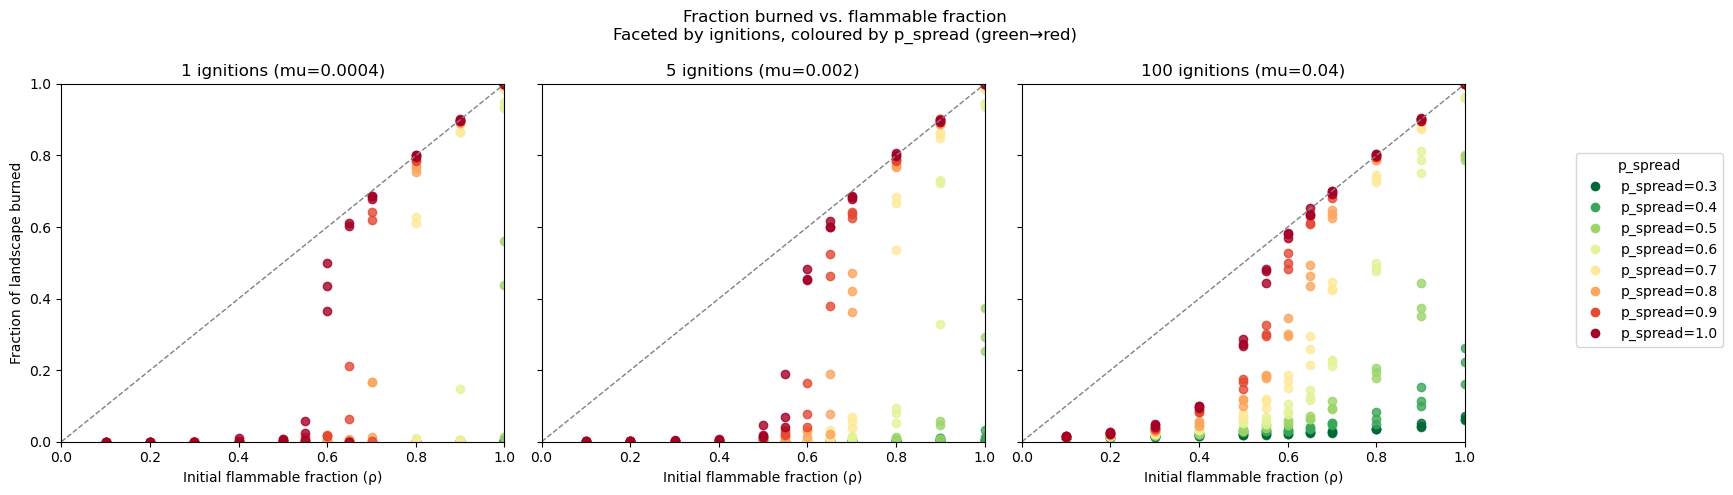

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}
mu_order = [0.0004, 0.002, 0.04]
spread_values = sorted(df['p_spread'].unique())

# colormap: green to red (reversed)
cmap = plt.get_cmap('RdYlGn_r')
colors = [cmap(i / (len(spread_values)-1)) for i in range(len(spread_values))]

fig, axes = plt.subplots(1, len(mu_order), figsize=(5 * len(mu_order) + 2, 5), sharey=True)

for i, mu in enumerate(mu_order):
    ax = axes[i]
    subset = df[df['mu'] == mu]
    for j, p_spread in enumerate(spread_values):
        sub_spread = subset[subset['p_spread'] == p_spread]
        ax.scatter(sub_spread['rho'], sub_spread['burned_fraction'],
                   alpha=0.8, color=colors[j])
    # Force axes limits to [0, 1]
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    # Add diagonal dashed line
    ax.plot([0, 1], [0, 1], ls='--', color='grey', lw=1)
    ax.set_xlabel('Initial flammable fraction (ρ)')
    ax.set_title(f'{mu_to_fires[mu]} ignitions (mu={mu})')
    if i == 0:
        ax.set_ylabel('Fraction of landscape burned')

# Create a single legend for p_spread colours outside the right of the panes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[j], markersize=8)
           for j in range(len(spread_values))]
labels = [f'p_spread={p_spread}' for p_spread in spread_values]
fig.legend(handles, labels, title='p_spread', loc='center left', bbox_to_anchor=(0.93, 0.5), borderaxespad=0.)

plt.suptitle('Fraction burned vs. flammable fraction\nFaceted by ignitions, coloured by p_spread (green→red)')
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('fig2_faceted.png', dpi=300, bbox_inches='tight')
plt.show()

Thanks. While I want the axes limits forced 0,1 I also need a little bit of buffer so that all points are visible

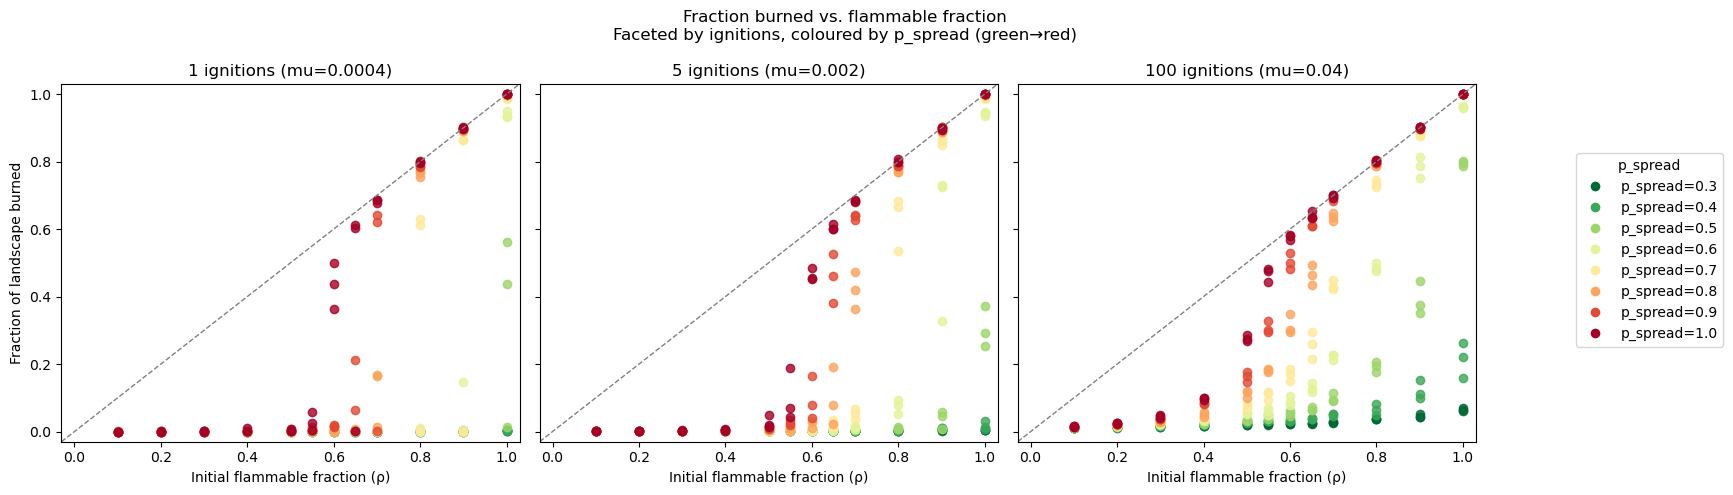

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}
mu_order = [0.0004, 0.002, 0.04]
spread_values = sorted(df['p_spread'].unique())

# colormap: green to red (reversed)
cmap = plt.get_cmap('RdYlGn_r')
colors = [cmap(i / (len(spread_values)-1)) for i in range(len(spread_values))]

fig, axes = plt.subplots(1, len(mu_order), figsize=(5 * len(mu_order) + 2, 5), sharey=True)

buffer = 0.03  # Small buffer for axes

for i, mu in enumerate(mu_order):
    ax = axes[i]
    subset = df[df['mu'] == mu]
    for j, p_spread in enumerate(spread_values):
        sub_spread = subset[subset['p_spread'] == p_spread]
        ax.scatter(sub_spread['rho'], sub_spread['burned_fraction'],
                   alpha=0.8, color=colors[j])
    # Force axes limits to [0-buffer, 1+buffer]
    ax.set_xlim(0-buffer, 1+buffer)
    ax.set_ylim(0-buffer, 1+buffer)
    # Add diagonal dashed line
    ax.plot([0-buffer, 1+buffer], [0-buffer, 1+buffer], ls='--', color='grey', lw=1)
    ax.set_xlabel('Initial flammable fraction (ρ)')
    ax.set_title(f'{mu_to_fires[mu]} ignitions (mu={mu})')
    if i == 0:
        ax.set_ylabel('Fraction of landscape burned')

# Create a single legend for p_spread colours outside the right of the panes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[j], markersize=8)
           for j in range(len(spread_values))]
labels = [f'p_spread={p_spread}' for p_spread in spread_values]
fig.legend(handles, labels, title='p_spread', loc='center left', bbox_to_anchor=(0.93, 0.5), borderaxespad=0.)

plt.suptitle('Fraction burned vs. flammable fraction\nFaceted by ignitions, coloured by p_spread (green→red)')
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('fig2_faceted.png', dpi=300, bbox_inches='tight')
plt.show()

great. how to align the legend snugly against the right-hand pane

> To align the legend snugly against the right-hand pane, slightly increase the `bbox_to_anchor` x-value until the legend is just outside the last subplot.
Try values between `0.88` and `0.95` depending on your figure size and layout.
>
> For your current code, set:

In [ ]:
fig.legend(
    handles, labels, title='p_spread',
    loc='center left', bbox_to_anchor=(0.88, 0.5), borderaxespad=0.,
    fontsize=14, title_fontsize=15
)

> This will place the legend closer to the right edge of the last pane.

> Tip:
> 
> - If you want it even closer, decrease `bbox_to_anchor` further (e.g. `0.86`).
> - If you want a little more space, increase it slightly.

>Summary:
> Adjust the first value in `bbox_to_anchor=(x, 0.5)` to control horizontal legend position.
> Lower values move it closer to the panes.

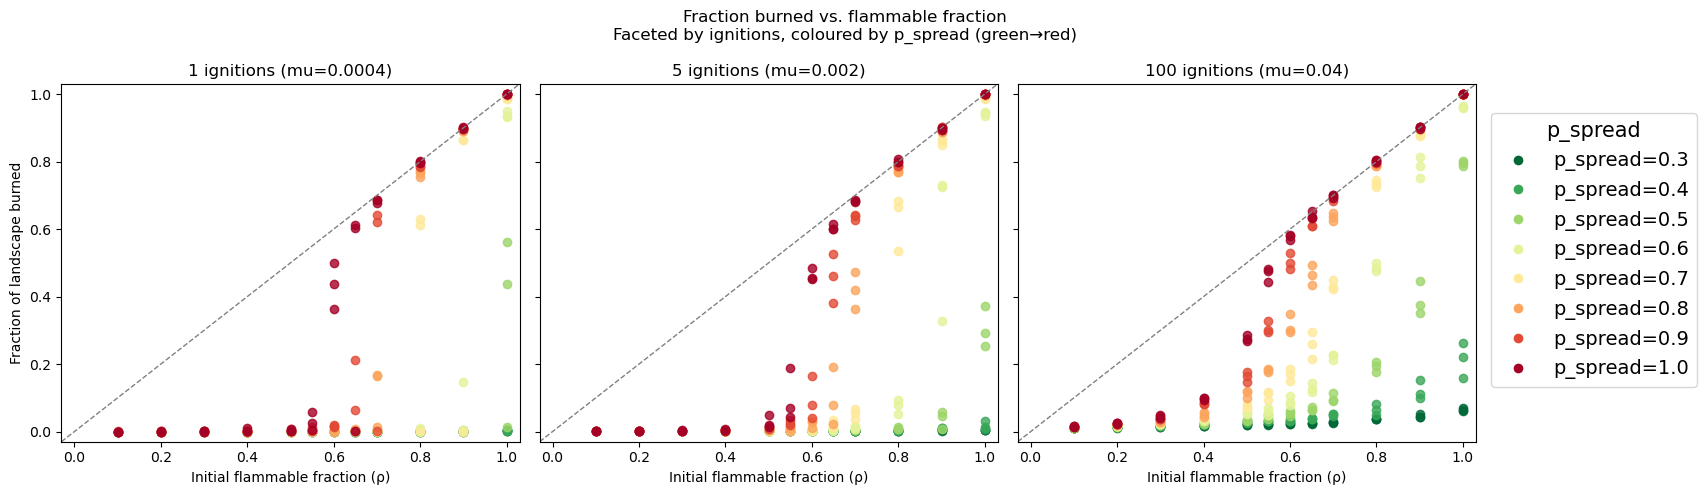

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load results
df = pd.read_csv('../results/results_2025-07-22.csv')

mu_to_fires = {0.0004: 1, 0.002: 5, 0.04: 100}
mu_order = [0.0004, 0.002, 0.04]
spread_values = sorted(df['p_spread'].unique())

# colormap: green to red (reversed)
cmap = plt.get_cmap('RdYlGn_r')
colors = [cmap(i / (len(spread_values)-1)) for i in range(len(spread_values))]

fig, axes = plt.subplots(1, len(mu_order), figsize=(5 * len(mu_order) + 2, 5), sharey=True)

buffer = 0.03  # Small buffer for axes

for i, mu in enumerate(mu_order):
    ax = axes[i]
    subset = df[df['mu'] == mu]
    for j, p_spread in enumerate(spread_values):
        sub_spread = subset[subset['p_spread'] == p_spread]
        ax.scatter(sub_spread['rho'], sub_spread['burned_fraction'],
                   alpha=0.8, color=colors[j])
    # Force axes limits to [0-buffer, 1+buffer]
    ax.set_xlim(0-buffer, 1+buffer)
    ax.set_ylim(0-buffer, 1+buffer)
    # Add diagonal dashed line
    ax.plot([0-buffer, 1+buffer], [0-buffer, 1+buffer], ls='--', color='grey', lw=1)
    ax.set_xlabel('Initial flammable fraction (ρ)')
    ax.set_title(f'{mu_to_fires[mu]} ignitions (mu={mu})')
    if i == 0:
        ax.set_ylabel('Fraction of landscape burned')

# Create a single legend for p_spread colours outside the right of the panes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[j], markersize=8)
           for j in range(len(spread_values))]
labels = [f'p_spread={p_spread}' for p_spread in spread_values]
fig.legend(handles, labels, title='p_spread',
    loc='center left', bbox_to_anchor=(0.88, 0.5), borderaxespad=0.,
    fontsize=14, title_fontsize=15
)

plt.suptitle('Fraction burned vs. flammable fraction\nFaceted by ignitions, coloured by p_spread (green→red)')
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('fig2_faceted.png', dpi=300, bbox_inches='tight')
plt.show()